<h2><center>HR Analytics ML Project</center></h2>
<h3><center>EDA - Exploratory Data Analysis</center></h3>
<h4><center>Author: Akshay Pandurang Paunikar</center></h4>
<h5>Problem Statement:</h5>
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

 - They first identify a set of employees based on recommendations/ past performance
 - Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
 - At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

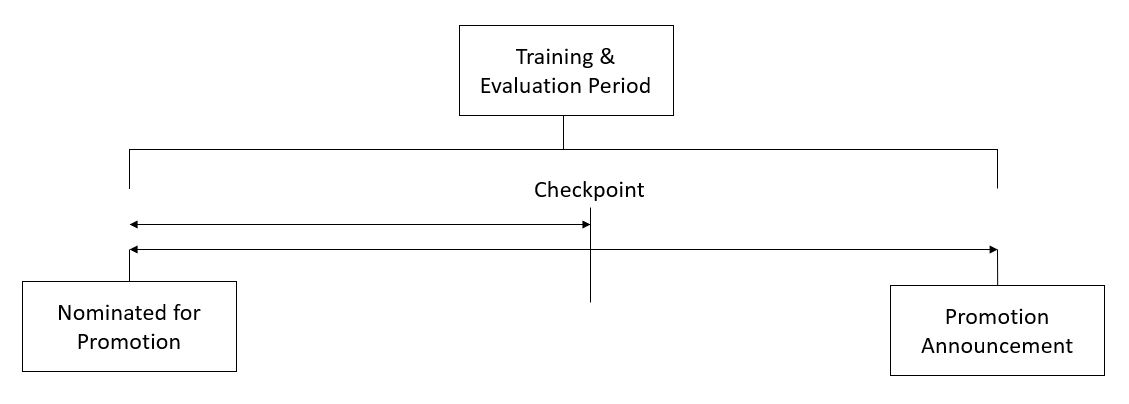

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

<h5>Dataset Description:</h5>

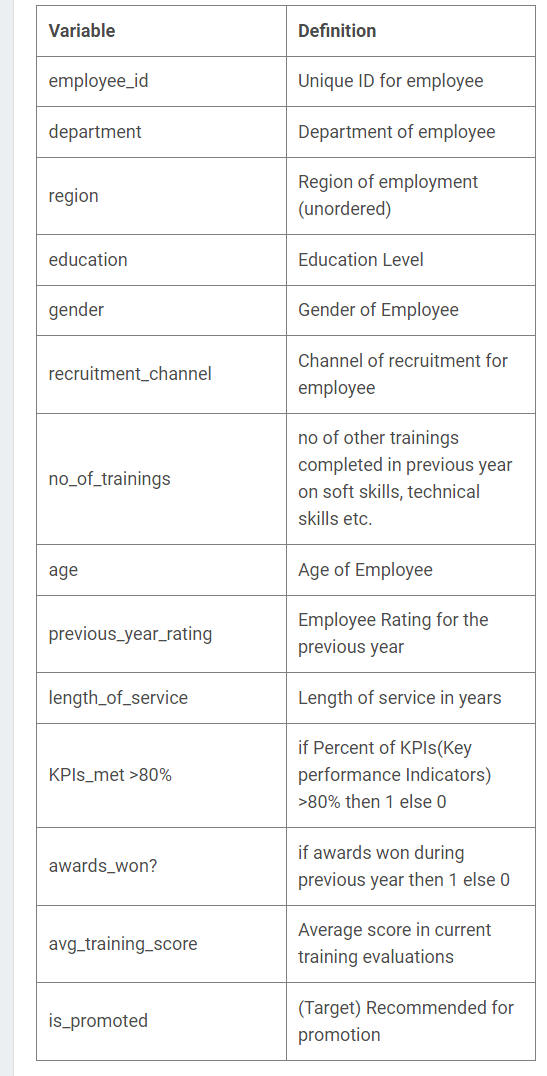

In [175]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [176]:
# set the working directory
import io
%cd "datasets/"

[WinError 2] The system cannot find the file specified: 'datasets/'
e:\iNeuron\Projects\HR_Analytics\notebook\datasets


In [177]:
# load the train and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# check the dimensions of data
print("train data:", train_data.shape)
print("test data:", test_data.shape)

train data: (54808, 14)
test data: (23490, 13)


In [178]:
# check first 5 records of train data
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [179]:
# check first 5 records of test data
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [180]:
# datatypes (train data)
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [181]:
# datatypes (test data)
test_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [182]:
# descriptive statistics (train data)
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


In [183]:
# descriptive statistics (test data)
test_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,23490.0,NaN,NaN,NaN,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
department,23490,9,Sales & Marketing,7315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,23490,34,region_2,5299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,22456,3,Bachelor's,15578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,23490,2,m,16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,23490,3,other,13078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,23490.0,NaN,NaN,NaN,1.254236,0.60091,1.0,1.0,1.0,1.0,9.0
age,23490.0,NaN,NaN,NaN,34.782929,7.679492,20.0,29.0,33.0,39.0,60.0
previous_year_rating,21678.0,NaN,NaN,NaN,3.339146,1.263294,1.0,3.0,3.0,4.0,5.0
length_of_service,23490.0,NaN,NaN,NaN,5.810387,4.207917,1.0,3.0,5.0,7.0,34.0


In [184]:
# concise info (train data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [185]:
# concise info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


Drop "employee_id" columns as it is not necessary for our analysis

In [186]:
# dropping "employee_id" column from train data and test data.
train_data = train_data.drop(['employee_id'], axis=1)
test_data = test_data.drop(['employee_id'], axis=1)

Now we will map the values in some of the columns for ease of understanding and exploratory data analysis.

In [187]:
train_data['gender'] = train_data['gender'].map({'f':'Female','m':'Male'})
train_data['KPIs_met >80%'] = train_data['KPIs_met >80%'].map({0:'No',1:'Yes'})
train_data['awards_won?'] = train_data['awards_won?'].map({0:'No',1:'Yes'})
train_data['is_promoted'] = train_data['is_promoted'].map({0:'No',1:'Yes'})

In [188]:
train_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,Female,sourcing,1,35,5.0,8,Yes,No,49,No
1,Operations,region_22,Bachelor's,Male,other,1,30,5.0,4,No,No,60,No
2,Sales & Marketing,region_19,Bachelor's,Male,sourcing,1,34,3.0,7,No,No,50,No
3,Sales & Marketing,region_23,Bachelor's,Male,other,2,39,1.0,10,No,No,50,No
4,Technology,region_26,Bachelor's,Male,other,1,45,3.0,2,No,No,73,No


In [189]:
test_data['gender'] = test_data['gender'].map({'f':'Female','m':'Male'})
test_data['KPIs_met >80%'] = test_data['KPIs_met >80%'].map({0:'No',1:'Yes'})
test_data['awards_won?'] = test_data['awards_won?'].map({0:'No',1:'Yes'})

In [190]:
test_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,Male,sourcing,1,24,NaN,1,Yes,No,77
1,HR,region_4,Bachelor's,Female,other,1,31,3.0,5,No,No,51
2,Sales & Marketing,region_13,Bachelor's,Male,other,1,31,1.0,4,No,No,47
3,Procurement,region_2,Bachelor's,Female,other,3,31,2.0,9,No,No,65
4,Finance,region_29,Bachelor's,Male,sourcing,1,30,4.0,7,No,No,61


In [191]:
# check for null/missing values (train data)
train_data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [192]:
# check for null/missing values (test data)
test_data.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [193]:
# impute missing values in train and test data

# train data
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])
train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

# test data
test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median())

In [194]:
# check for null/missing values (train data)
train_data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [195]:
# check for null/missing values (test data)
test_data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [196]:
# check for duplicate values (train data) and (test data)
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

161
38


In [197]:
# drop duplicates (train data) and (test data)
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [198]:
# check for duplicate values (train data) and (test data)
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [199]:
# save the data to csv file
train_data.to_csv("train_data.csv", index=False, header=True)
test_data.to_csv("test_data.csv", index=False, header=True)

### Exploratory Data Analysis:
#### Univariate Analysis:

In [200]:
# categorical columns and numerical columns
categorical_columns = train_data.select_dtypes(include="object").columns
numerical_columns = train_data.select_dtypes(exclude="object").columns

print("categorical columns:\n", categorical_columns)
print("numerical columns:\n", numerical_columns)

categorical columns:
 Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')
numerical columns:
 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score'],
      dtype='object')


In [201]:
# department
train_data['department'].value_counts()

Sales & Marketing    16756
Operations           11317
Procurement           7131
Technology            7130
Analytics             5336
Finance               2534
HR                    2412
Legal                 1032
R&D                    999
Name: department, dtype: int64

In [202]:
# region
train_data['region'].value_counts()

region_2     12295
region_22     6387
region_7      4836
region_15     2797
region_13     2643
region_26     2253
region_31     1927
region_4      1703
region_27     1652
region_16     1465
region_28     1318
region_11     1314
region_23     1173
region_29      992
region_32      942
region_19      873
region_20      846
region_14      827
region_25      817
region_17      796
region_5       765
region_6       688
region_30      655
region_8       654
region_10      648
region_1       610
region_24      507
region_12      498
region_9       418
region_21      411
region_3       346
region_34      291
region_33      269
region_18       31
Name: region, dtype: int64

In [203]:
# education
train_data['education'].value_counts()

Bachelor's          38926
Master's & above    14920
Below Secondary       801
Name: education, dtype: int64

In [204]:
# gender
train_data['gender'].value_counts()

Male      38367
Female    16280
Name: gender, dtype: int64

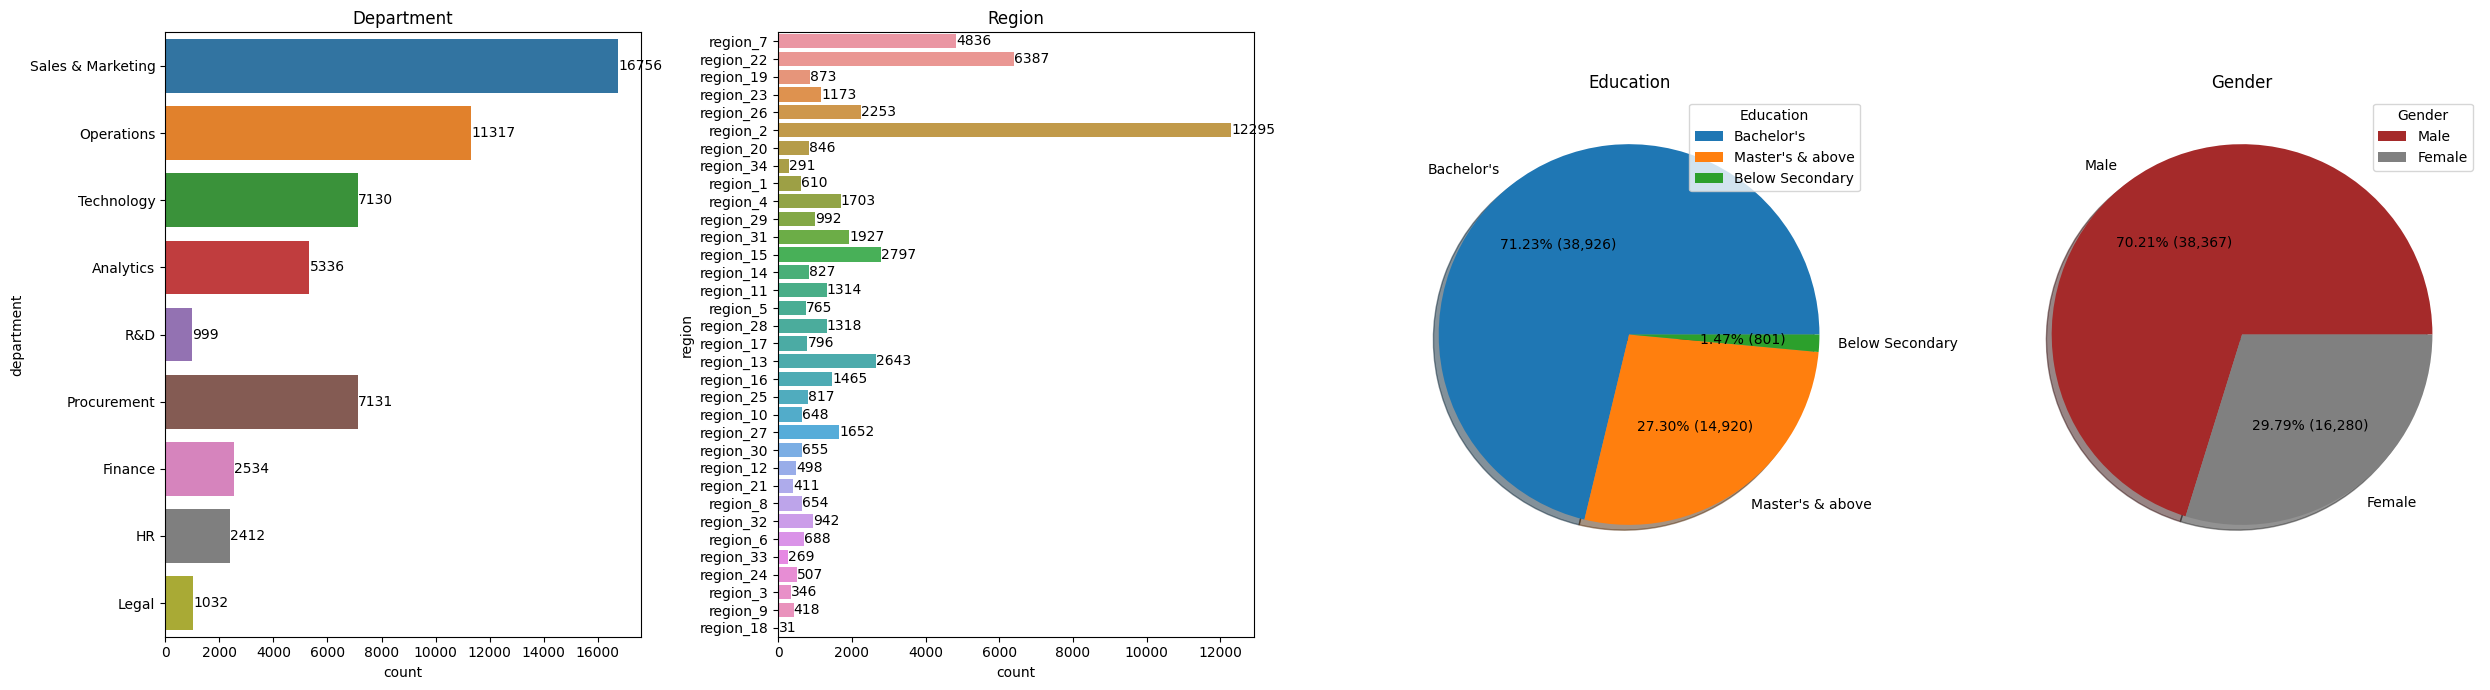

In [205]:
plt.figure(figsize=(25,7))

# department

ax1 = plt.subplot2grid((1,4),(0,0))

sns.countplot(y='department', data=train_data, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("Department")

# region

ax2 = plt.subplot2grid((1,4),(0,1))

sns.countplot(y='region', data=train_data, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("Region")

# education

ax3 = plt.subplot2grid((1,4),(0,2))

Dataeducation = train_data['education'].value_counts().values
Labeleducation = train_data['education'].value_counts().index

plt.pie(x=Dataeducation, labels=Labeleducation,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(Dataeducation)/100), shadow=True)
plt.legend(Labeleducation, loc='best', title='Education')
plt.title("Education")

# gender

ax4 = plt.subplot2grid((1,4),(0,3))

Datagender = train_data['gender'].value_counts().values
Labelgender = train_data['gender'].value_counts().index

plt.pie(x=Datagender, labels=Labelgender,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(Datagender)/100), colors=['brown','gray'], shadow=True)
plt.legend(Labelgender, loc='best', title='Gender')
plt.title("Gender")

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees work in department Sales & Marketing followed by Operations, Procurement, Technology, Analytics, Finance, HR, Legal and R&D.
 - Most of the employees work in the region 2 followed by region 22, region 7 and so on.
 - Most of the employees have education as Bachelor's followed by Master's and above and Below Secondary.
 - Most of the employees are Males.

In [206]:
# recruitment_channel
train_data['recruitment_channel'].value_counts()

other       30356
sourcing    23150
referred     1141
Name: recruitment_channel, dtype: int64

In [207]:
# KPIs_met >80%
train_data['KPIs_met >80%'].value_counts()

No     35390
Yes    19257
Name: KPIs_met >80%, dtype: int64

In [208]:
# awards_won
train_data['awards_won?'].value_counts()

No     53377
Yes     1270
Name: awards_won?, dtype: int64

In [209]:
# is_promoted
train_data['is_promoted'].value_counts()

No     49982
Yes     4665
Name: is_promoted, dtype: int64

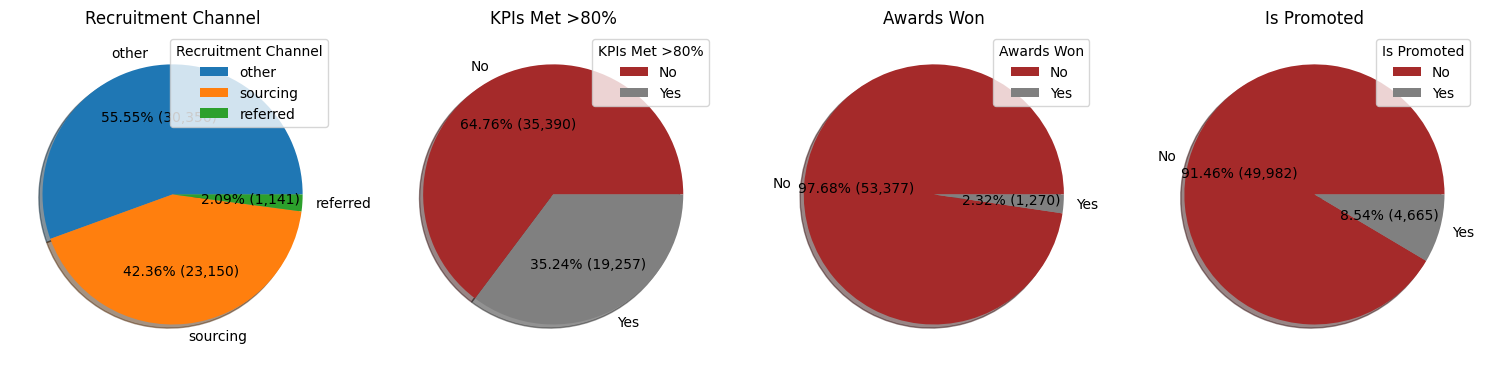

In [210]:
plt.figure(figsize=(15,5))

# recruitment_channel

ax1 = plt.subplot2grid((1,4),(0,0))

Datarecruitmentchannel = train_data['recruitment_channel'].value_counts().values
Labelrecruitmentchannel = train_data['recruitment_channel'].value_counts().index

plt.pie(x=Datarecruitmentchannel, labels=Labelrecruitmentchannel,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(Datarecruitmentchannel)/100), shadow=True)
plt.legend(Labelrecruitmentchannel, loc='best', title='Recruitment Channel')
plt.title("Recruitment Channel")

# KPIs_met >80%

ax2 = plt.subplot2grid((1,4),(0,1))

DataKPI = train_data['KPIs_met >80%'].value_counts().values
LabelKPI = train_data['KPIs_met >80%'].value_counts().index

plt.pie(x=DataKPI, labels=LabelKPI,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(DataKPI)/100), colors=['brown','gray'], shadow=True)
plt.legend(LabelKPI, loc='best', title='KPIs Met >80%')
plt.title("KPIs Met >80%")

# awards_won

ax3 = plt.subplot2grid((1,4),(0,2))

DataAwards = train_data['awards_won?'].value_counts().values
LabelAwards = train_data['awards_won?'].value_counts().index

plt.pie(x=DataAwards, labels=LabelAwards,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(DataAwards)/100), colors=['brown','gray'], shadow=True)
plt.legend(LabelAwards, loc='best', title='Awards Won')
plt.title("Awards Won")

# is_promoted

ax4 = plt.subplot2grid((1,4),(0,3))

DataPromoted = train_data['is_promoted'].value_counts().values
LabelPromoted = train_data['is_promoted'].value_counts().index

plt.pie(x=DataPromoted, labels=LabelPromoted,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(DataPromoted)/100), colors=['brown','gray'], shadow=True)
plt.legend(LabelPromoted, loc='best', title='Is Promoted')
plt.title("Is Promoted")

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees were recruited through recruitment channel other followed by sourcing and referred.
 - Most of the employees did not met the KPI's.
 - Most of the employees did not won any awards.
 - Most of the employees are not promoted.

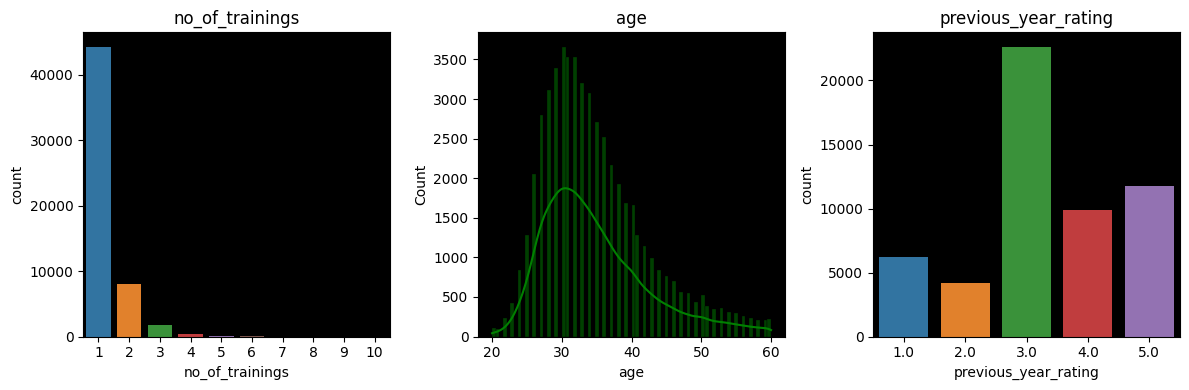

In [211]:
plt.figure(figsize=(12,4))

# no_of_trainings

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(data=train_data, x='no_of_trainings', ax=ax1)
ax1.set_facecolor('black')
plt.title("no_of_trainings")

# age

ax2 = plt.subplot2grid((1,3),(0,1))

sns.histplot(data=train_data, x='age', kde=True, color='green',ax=ax2)
ax2.set_facecolor('black')
plt.title("age")

# previous_year_rating

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(data=train_data, x='previous_year_rating', ax=ax3)
ax3.set_facecolor('black')
plt.title("previous_year_rating")

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees undergone atleast 1 training program last year.
 - Most of the employees are in the age between 25 to 35 years.
 - Most of the employees have rating as 3 followed by 4 and 5.

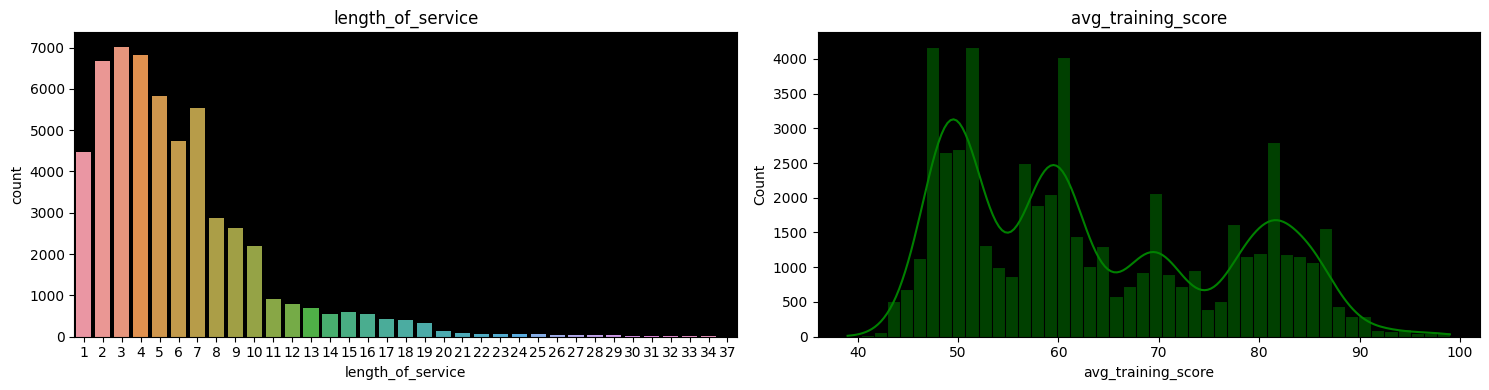

In [212]:
plt.figure(figsize=(15,4))

# length_of_service

ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(data=train_data, x='length_of_service', ax=ax1)
ax1.set_facecolor('black')
plt.title("length_of_service")

# avg_training_score

ax2 = plt.subplot2grid((1,2),(0,1))

sns.histplot(data=train_data, x='avg_training_score', kde=True, color='green',ax=ax2)
ax2.set_facecolor('black')
plt.title("avg_training_score")

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees served the company for 2 to 5 years.
 - Most of the employees had average training score between 50 to 60.

#### Bivariate Analysis:

In [213]:
# department vs promotion
train_data.groupby(['department','is_promoted']).size().reset_index().rename(columns={0:'Counts'})

,department,is_promoted,Counts
0,Analytics,No,4825
1,Analytics,Yes,511
2,Finance,No,2328
3,Finance,Yes,206
4,HR,No,2276
5,HR,Yes,136
6,Legal,No,979
7,Legal,Yes,53
8,Operations,No,10295
9,Operations,Yes,1022


In [214]:
# department vs gender
train_data.groupby(['department','gender']).size().reset_index().rename(columns={0:'Counts'})

,department,gender,Counts
0,Analytics,Female,510
1,Analytics,Male,4826
2,Finance,Female,681
3,Finance,Male,1853
4,HR,Female,1002
5,HR,Male,1410
6,Legal,Female,149
7,Legal,Male,883
8,Operations,Female,4664
9,Operations,Male,6653


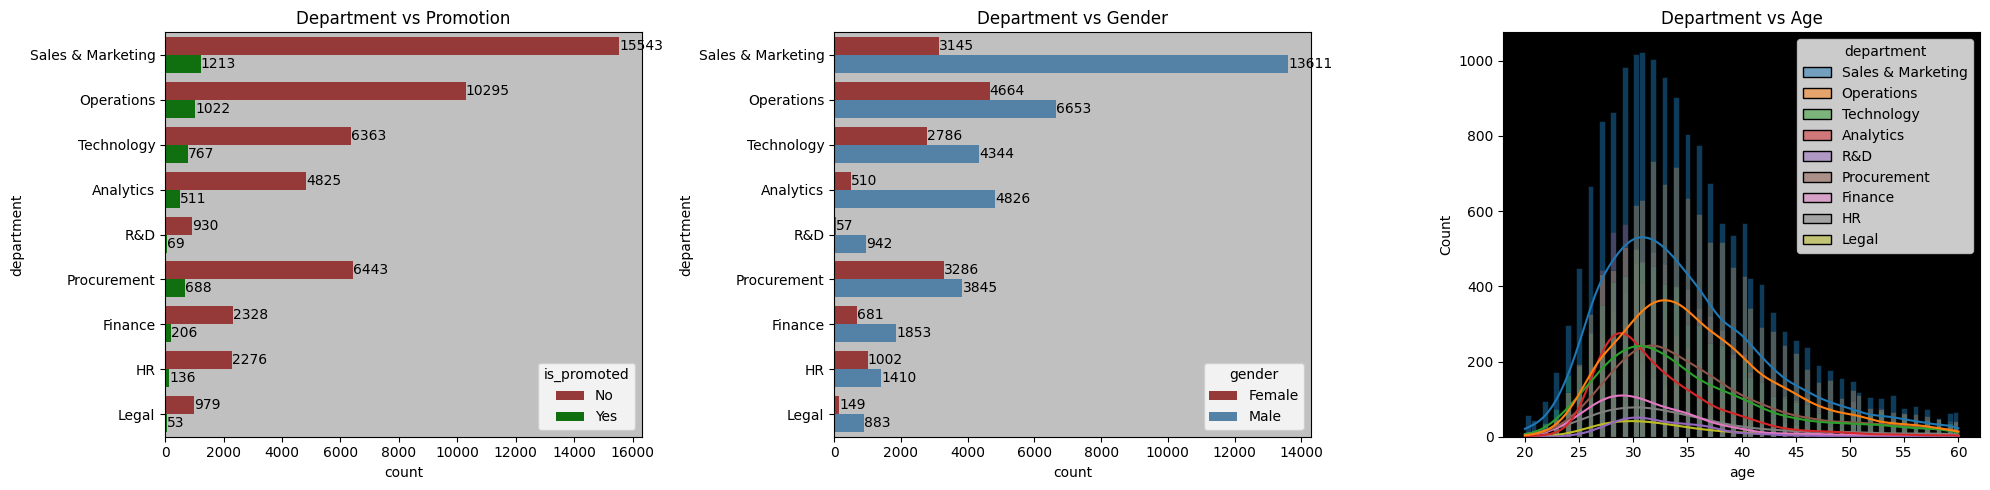

In [219]:
plt.figure(figsize=(20,5))

# department vs promotion

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='department', data=train_data, hue='is_promoted', palette=['brown','green'], ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('silver')
plt.title('Department vs Promotion')

# department vs gender

ax2 = plt.subplot2grid((1,3),(0,1))

sns.countplot(y='department', data=train_data, hue='gender', palette=['brown','steelblue'], ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_facecolor('silver')
plt.title('Department vs Gender')

# department vs age

ax3 = plt.subplot2grid((1,3),(0,2))

sns.histplot(data=train_data, x='age', hue='department', kde=True, color='green', ax=ax3)
ax3.set_facecolor('black')
plt.title("Department vs Age")

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees promoted are from department Sales & Marketing followed by Operations, Technology and so on.
 - Most of the employees working in various department are Male employees.
 - Most of the employees working in various department are aged between 25 to 40 years.

In [221]:
# department vs education
train_data.groupby(['department','education']).size().reset_index().rename(columns={0:'Counts'})

,department,education,Counts
0,Analytics,Bachelor's,4299
1,Analytics,Master's & above,1037
2,Finance,Bachelor's,1929
3,Finance,Below Secondary,106
4,Finance,Master's & above,499
5,HR,Bachelor's,1553
6,HR,Below Secondary,126
7,HR,Master's & above,733
8,Legal,Bachelor's,811
9,Legal,Below Secondary,65


In [225]:
# department vs recruitment channel
train_data.groupby(['department','recruitment_channel']).size().reset_index().rename(columns={0:'Counts'})

,department,recruitment_channel,Counts
0,Analytics,other,2962
1,Analytics,referred,83
2,Analytics,sourcing,2291
3,Finance,other,1461
4,Finance,referred,5
5,Finance,sourcing,1068
6,HR,other,1378
7,HR,referred,102
8,HR,sourcing,932
9,Legal,other,588


In [231]:
# department vs KPI's met
train_data.groupby(['department','KPIs_met >80%']).size().reset_index().rename(columns={0:'Counts'})

,department,KPIs_met >80%,Counts
0,Analytics,No,3180
1,Analytics,Yes,2156
2,Finance,No,1483
3,Finance,Yes,1051
4,HR,No,1604
5,HR,Yes,808
6,Legal,No,687
7,Legal,Yes,345
8,Operations,No,6442
9,Operations,Yes,4875


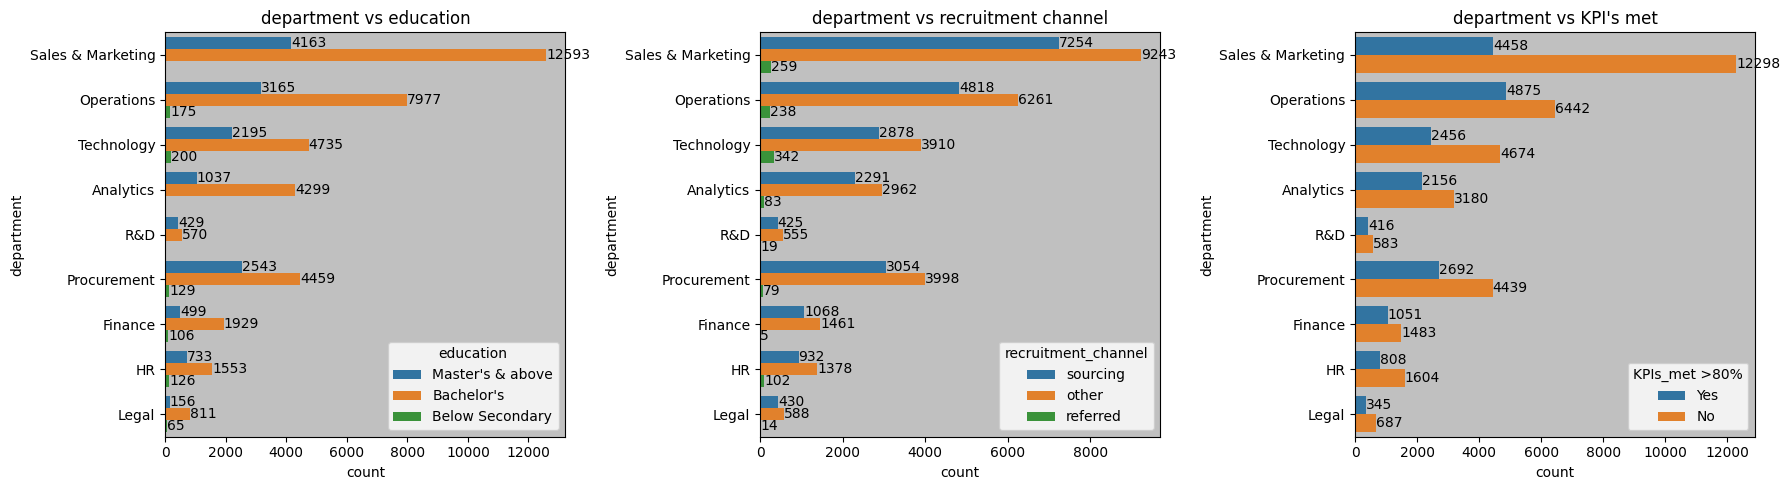

In [233]:
plt.figure(figsize=(18,5))

# department vs education

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='department', data=train_data, hue='education', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('silver')
plt.title("department vs education")

# department vs recruitment channel

ax2 = plt.subplot2grid((1,3),(0,1))

sns.countplot(y='department', data=train_data, hue='recruitment_channel', ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_facecolor('silver')
plt.title("department vs recruitment channel")

# department vs KPI's met

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='department', data=train_data, hue='KPIs_met >80%', ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
ax3.set_facecolor('silver')
plt.title("department vs KPI's met")

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees from various department have education as Bachelor's followed by Master's and above.
 - Most of the employees from various department are recruited through channel as Other followed by Sourcing and referred.
 - Most of the employees whose KPI's met are from department Sales & Marketing, followed by Operations, Technology and so on.

In [234]:
# department vs awards won
train_data.groupby(['department','awards_won?']).size().reset_index().rename(columns={0:'Counts'})

,department,awards_won?,Counts
0,Analytics,No,5206
1,Analytics,Yes,130
2,Finance,No,2464
3,Finance,Yes,70
4,HR,No,2367
5,HR,Yes,45
6,Legal,No,1007
7,Legal,Yes,25
8,Operations,No,11055
9,Operations,Yes,262


In [240]:
# department vs average no of trainings
department_trainings = train_data.groupby(['department'])['no_of_trainings'].mean().reset_index().round(2)
department_trainings

,department,no_of_trainings
0,Analytics,1.34
1,Finance,1.30
2,HR,1.05
3,Legal,1.09
4,Operations,1.16
5,Procurement,1.32
6,R&D,1.40
7,Sales & Marketing,1.28
8,Technology,1.26


In [242]:
# department vs average ratings
department_ratings = train_data.groupby(['department'])['previous_year_rating'].mean().reset_index().round(2)
department_ratings

,department,previous_year_rating
0,Analytics,3.51
1,Finance,3.45
2,HR,3.43
3,Legal,3.34
4,Operations,3.60
5,Procurement,3.28
6,R&D,3.51
7,Sales & Marketing,3.06
8,Technology,3.15


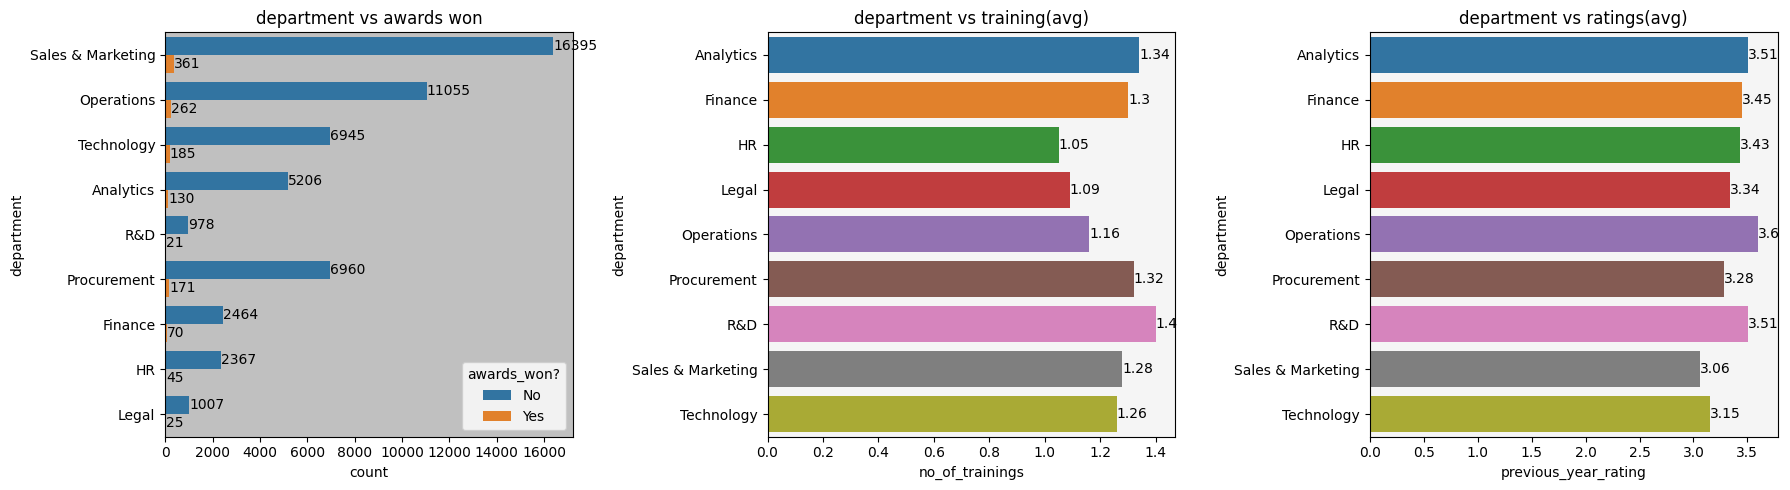

In [243]:
plt.figure(figsize=(18,5))

# department vs awards won

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='department', data=train_data, hue='awards_won?', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('silver')
plt.title("department vs awards won")

# department vs training(avg)

ax2 = plt.subplot2grid((1,3),(0,1))

sns.barplot(y='department', x='no_of_trainings', data=department_trainings, estimator=np.mean, ci=None, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_facecolor('whitesmoke')
plt.title("department vs training(avg)")

# department vs average ratings

ax3 = plt.subplot2grid((1,3),(0,2))

sns.barplot(y='department', x='previous_year_rating', data=department_ratings, estimator=np.mean, ci=None, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
ax3.set_facecolor('whitesmoke')
plt.title("department vs ratings(avg)")

plt.tight_layout()
plt.show()